<a href="https://colab.research.google.com/github/hailusong/attention/blob/master/keras_attention_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Keras Attention Layer](https://github.com/thushv89/attention_keras) Testing

In [0]:
%matplotlib inline

## Environment Setup

In [0]:
DEFAULT_HOME='/content'
TF_RT_VERSION='1.13'
PYTHON_VERSION='3.5'

YOUR_GCS_BUCKET='id-norm'
YOUR_PROJECT='orbital-purpose-130316'

In [3]:
!python -V
!ipython --version
!pip show prompt_toolkit
!protoc --version

Python 3.6.7
5.5.0
Name: prompt-toolkit
Version: 1.0.15
Summary: Library for building powerful interactive command lines in Python
Home-page: https://github.com/jonathanslenders/python-prompt-toolkit
Author: Jonathan Slenders
Author-email: UNKNOWN
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: wcwidth, six
Required-by: jupyter-console, ipython
libprotoc 3.0.0


In [4]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [5]:
# download the Keras Attention Implementation
![ -e {DEFAULT_HOME}/attention_keras ] && rm -rf {DEFAULT_HOME}/attention_keras
!git clone --depth 1 https://github.com/hailusong/attention_keras.git

Cloning into 'attention_keras'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 17 (delta 1), reused 12 (delta 1), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [6]:
!cat {DEFAULT_HOME}/attention_keras/layers/__init__.py

# expose everything in attention.py directly
# so the consumer doens't need to do
#     from attention_keras.layers.attention import AttentionLayer
# instead they can do
#     from attention_keras.layers import AttentionLayer
from .attention import *



### Data Setup

In [0]:
!mkdir -p data
!wget -q -O {DEFAULT_HOME}/attention_keras/data/small_vocab_en.txt https://github.com/udacity/deep-learning/blob/master/language-translation/data/small_vocab_en?raw=true
!wget -q -O {DEFAULT_HOME}/attention_keras/data/small_vocab_fr.txt https://github.com/udacity/deep-learning/blob/master/language-translation/data/small_vocab_fr?raw=true 

In [8]:
!head {DEFAULT_HOME}/attention_keras/data/small_vocab_en.txt {DEFAULT_HOME}/attention_keras/data/small_vocab_fr.txt

==> /content/attention_keras/data/small_vocab_en.txt <==
new jersey is sometimes quiet during autumn , and it is snowy in april .
the united states is usually chilly during july , and it is usually freezing in november .
california is usually quiet during march , and it is usually hot in june .
the united states is sometimes mild during june , and it is cold in september .
your least liked fruit is the grape , but my least liked is the apple .
his favorite fruit is the orange , but my favorite is the grape .
paris is relaxing during december , but it is usually chilly in july .
new jersey is busy during spring , and it is never hot in march .
our least liked fruit is the lemon , but my least liked is the grape .
the united states is sometimes busy during january , and it is sometimes warm in november .

==> /content/attention_keras/data/small_vocab_fr.txt <==
new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
les états-unis est généralement froid en juillet 

## Start Train

In [0]:
from attention_keras.layers import AttentionLayer

# attn_layer = AttentionLayer(name='attention_layer')
# attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

In [10]:
%run attention_keras/model/train_nmt.py

Length of text: 137860
Vocabulary size (English): 201
Vocabulary size (French): 345
En text shape: (100000, 20)
Fr text shape: (100000, 20)
Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_inputs (InputLayer)     (64, 20, 201)        0                                            
__________________________________________________________________________________________________
decoder_inputs (InputLayer)     (64, 19, 345)        0                                            
__________________________________________________________________________________________________
encoder_gru (GRU)               [(64, 20, 96), (64,  85824       encoder_inputs[0][0]             
_______________________________________________________________________________________________

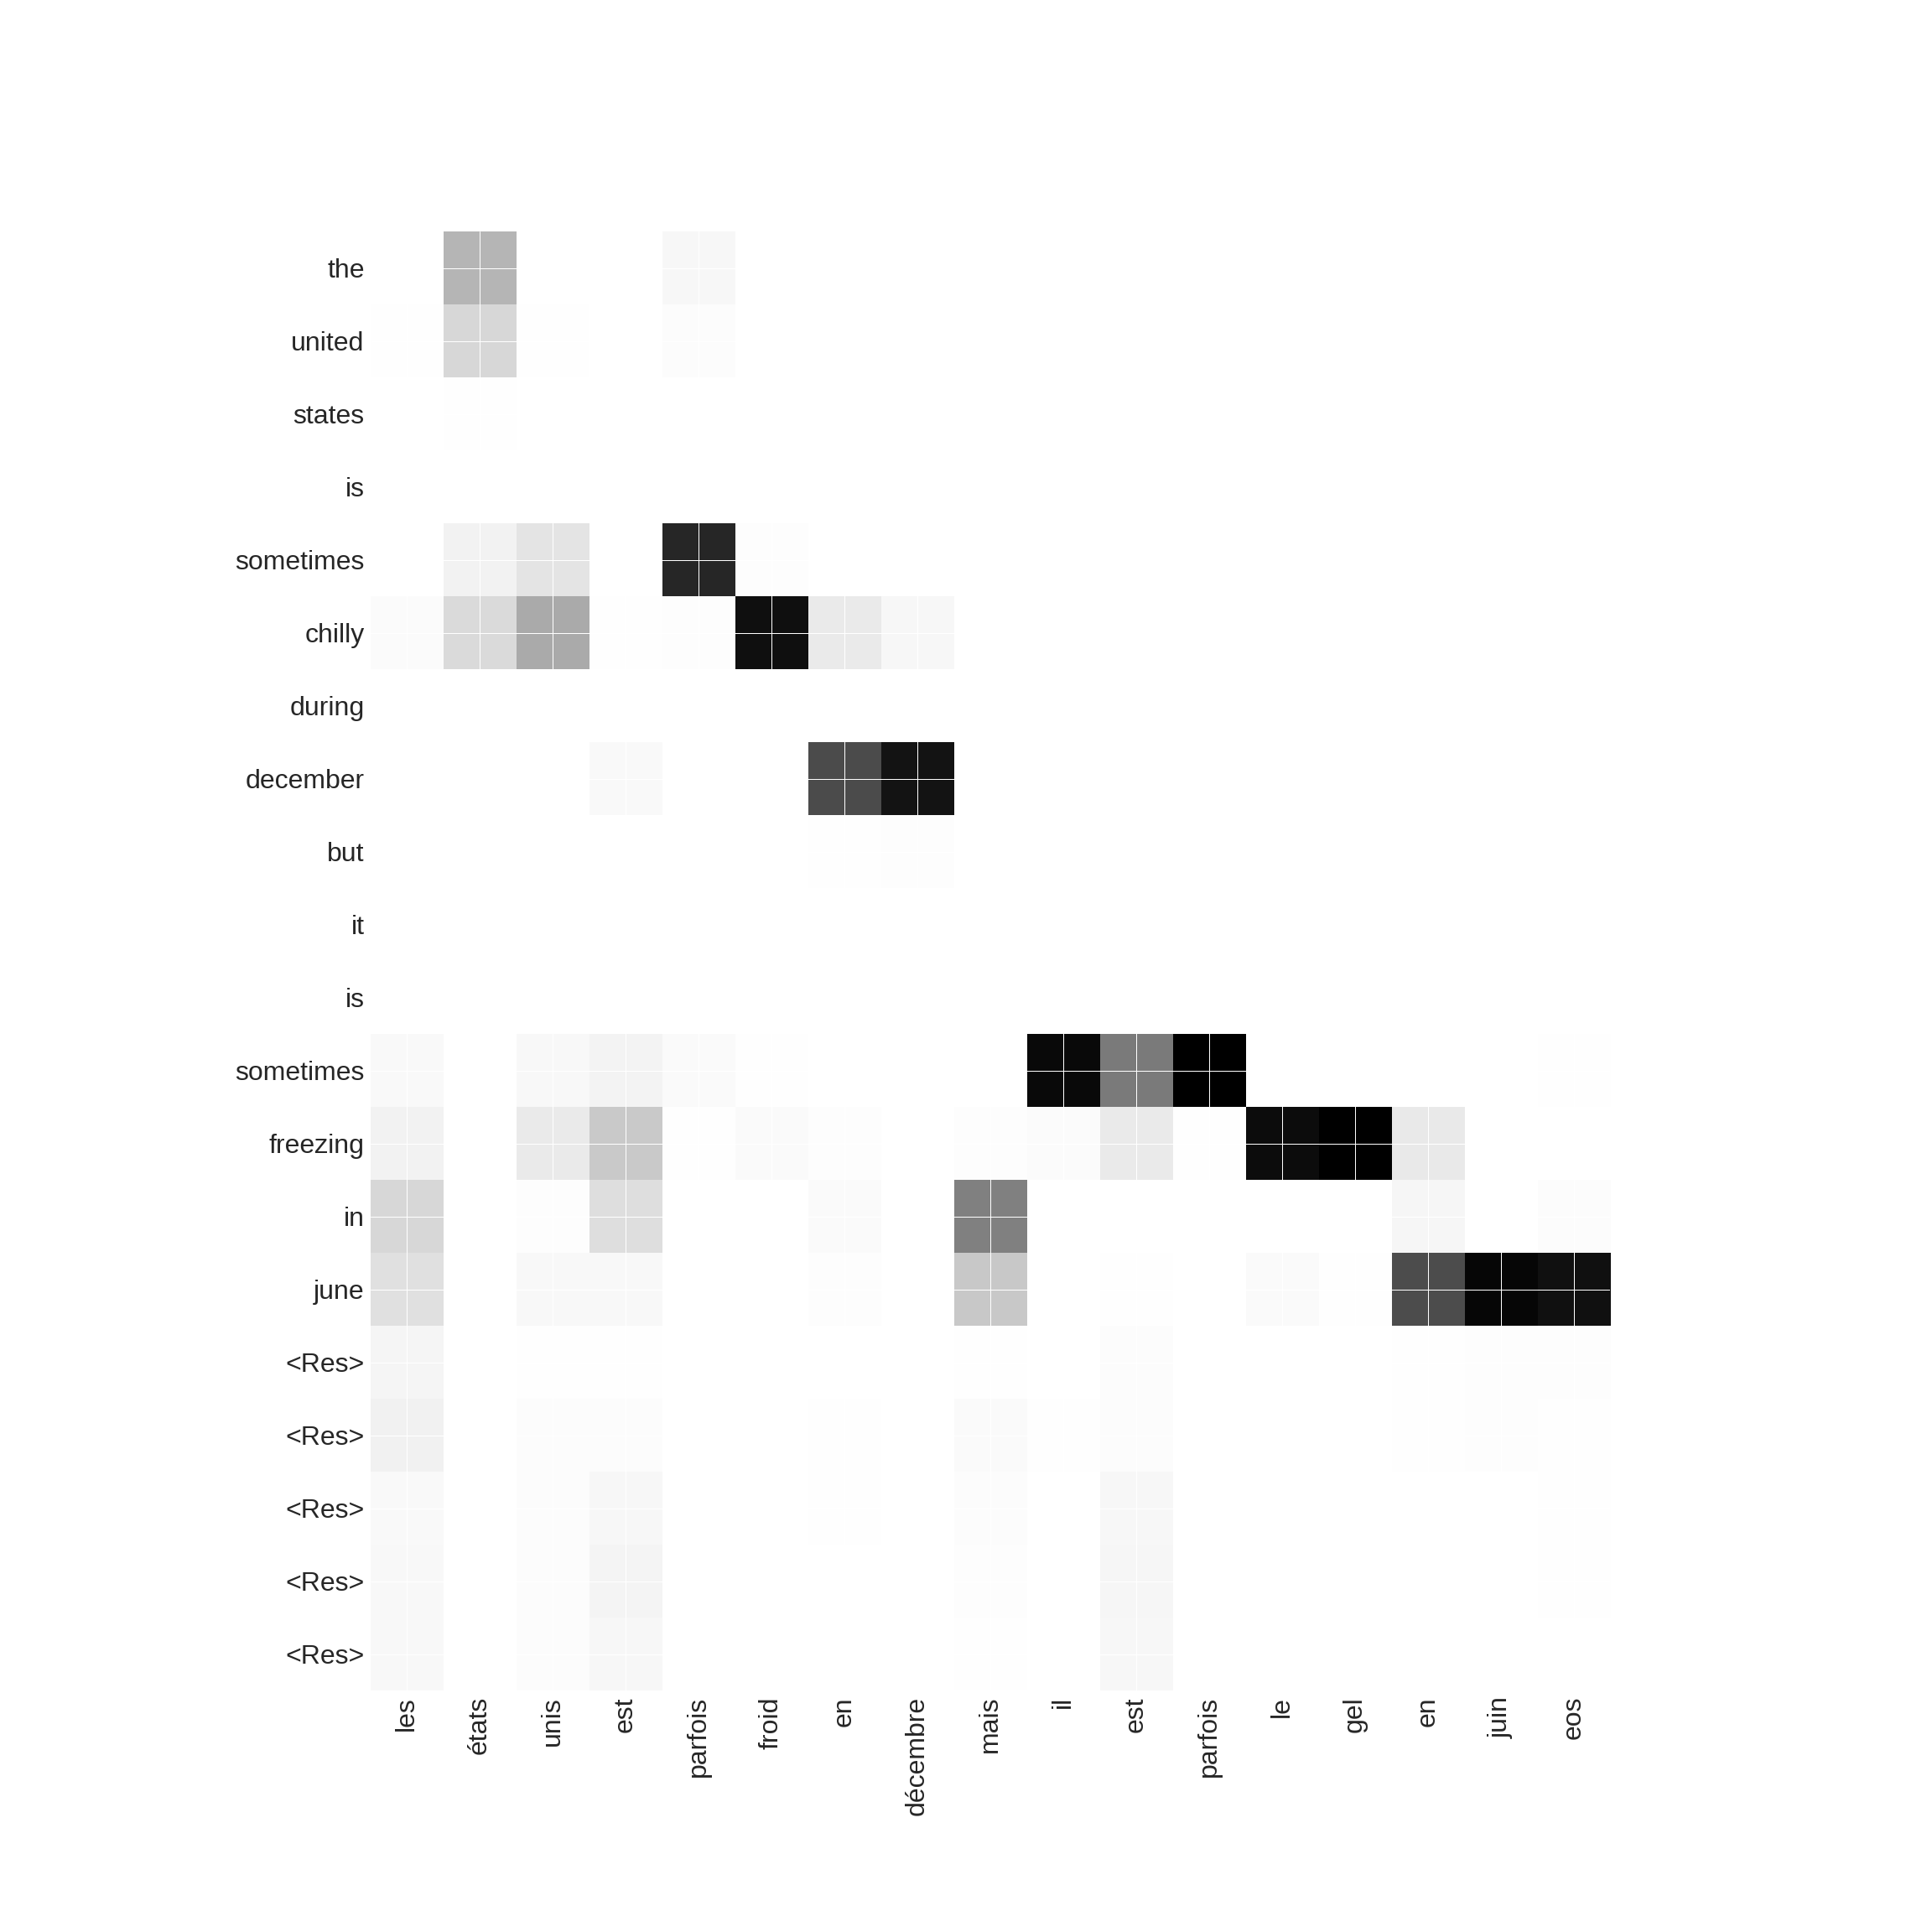

In [28]:
# plt.show()
from IPython.display import Image
Image(filename='../results/attention.png', width=800) 

In [31]:
print(f'English input sequence is {test_en_seq}, total len (incl. 0) is {len(test_en_seq[0])}')
print(f'Attention weight (french output, total english input) is ({len(attn_weights)}, {len(attn_weights[0][1][0][0])})')

English input sequence is [[ 6 22 23  2 10 69  5 45  7  4  2 10 54  3 34  0  0  0  0  0]], total len (incl. 0) is 20
Attention weight (french output, total english input) is (17, 20)
